## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
**I chose the variables year, hrs2 (number of hours usually work a week), marital (marital status), sibs (number of brothers and sisters), childs (number of children), age (age of respondent), and educ (highest year of school completed). I selected these variables to explore the relationships between demographic factors, work habits, and family size. Specifically, I'm interested in seeing how factors like age, education, and family background (number of siblings) might correlate with an individual's marital status, number of children, and working hours. These variables provide a broad overview of an individual's life circumstances and allow for an exploration of potential links between personal background, family choices, and career.**

**The data gives me insight on how people's relatinoship may affect how much time they have, at least in my perspective. If someone has a lot of kids it's likely they won't have enough time to go ahead and allocate it towards their kids.**
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)

**Age Distribution: The age distribution is somewhat skewed, indicating a non-uniform representation of different age groups in the sample. One thing I really did find interesting was around what age groups there was data on, which average around the "mid-life" crisis area it seems like.**

**Education Distribution: The distribution of education levels shows a range of educational attainment, with peaks at certain levels (e.g., 12 years, 16 years), corresponding to high school and college graduation. In which you see that a majority stopped after high schrool and that the 2nd greatest amount would be a bachelors degree.**

**Marital Status: The marital status distribution provides insights into the prevalence of different marital statuses within the dataset. A majority of the data was married, which kind of surprised me because I expected it to be fairly balanced since "50% of marriages end in a divorce", but there's also not too much context on the difference between separated and divorced.**

**Age vs. Number of Children: The scatter plot of age vs. the number of children can reveal trends in family size relative to age. This one was just fun to doe, as time goes on people tend to have more kids, but around late 40s it seems to start settling down. One question I did have was there's little gaps that can be seen around every 8-10 years, which im assuming are gaps between sibs in families like my family personally does.**

**Education vs. Working Hours: The relationship between education and working hours can suggest whether higher education levels correlate with different work patterns. The GED levels indicate a late of hours, which makes sense given that they tend to work blue collar jobs and bachelor degrees are similar, but more often than not white collar, seeing a pay correlation on this would've been interesting as well**

**Working Hours by Marital Status: The boxplot of working hours by marital status may indicate whether married individuals tend to work more or less than those with other marital statuses. It appears that people whom are married work a more balanced lifestyle and people whom are widows tend to work way more or less, which makes sense given that they might have to baggage to financially take care of.**

**Further analysis and interpretation would require a more in-depth look at these relationships. For instance, it would be beneficial to explore these relationships across different years to understand if there are temporal trends. Additionally, examining the interaction effects between these variables could provide a more nuanced understanding of the data. For example, the relationship between education and working hours differ for married vs. unmarried individuals.**

5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

**I chose to work alone for time sake**


Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 862 entries, 41 to 47418
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   year     862 non-null    datetime64[ns]
 1   id_      862 non-null    int64         
 2   hrs2     862 non-null    float64       
 3   marital  862 non-null    category      
 4   sibs     862 non-null    float64       
 5   childs   862 non-null    float64       
 6   age      862 non-null    float64       
 7   educ     862 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(5), int64(1)
memory usage: 55.1 KB

Descriptive Statistics:


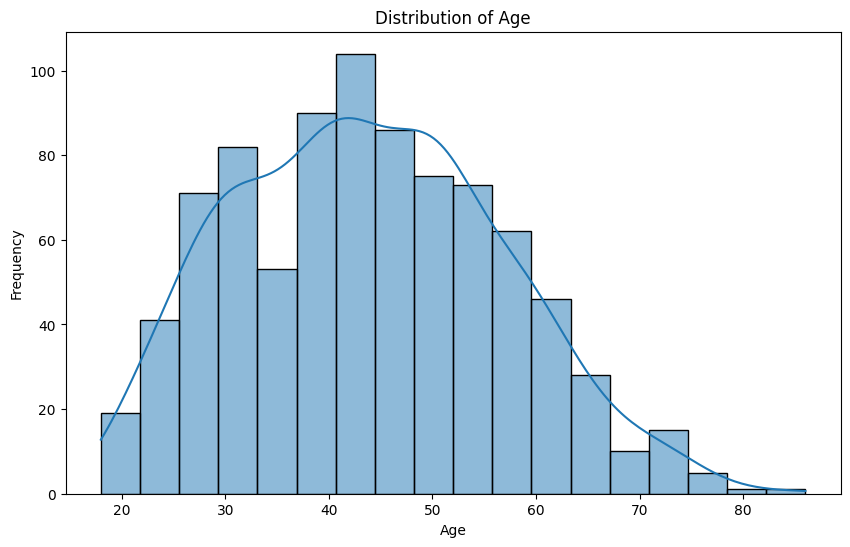

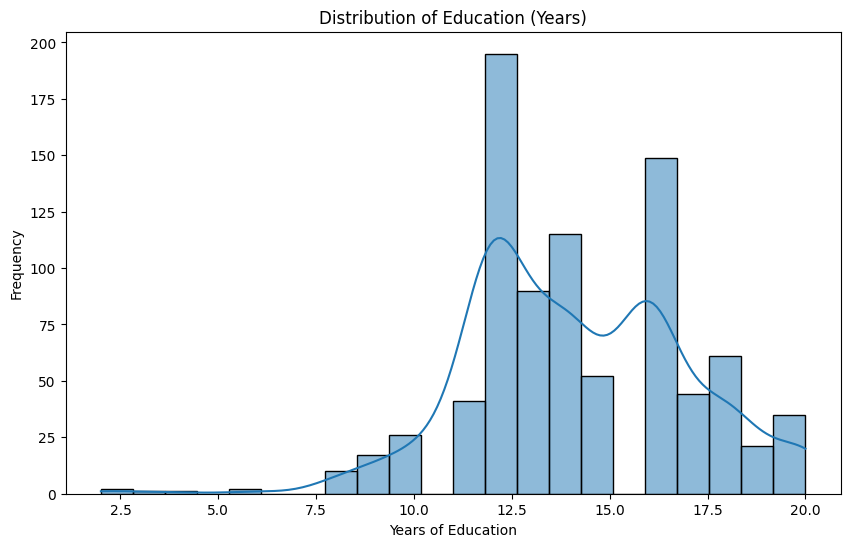

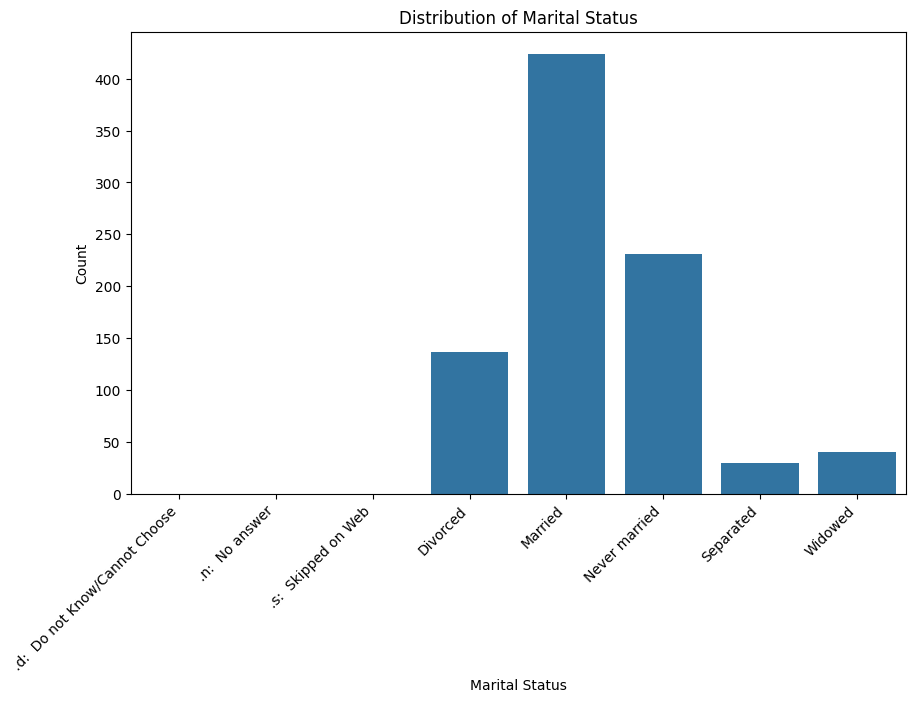

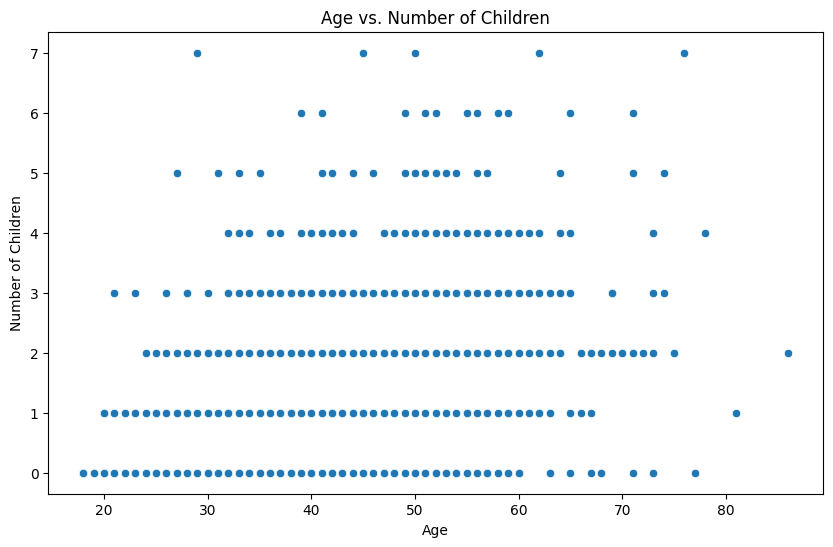

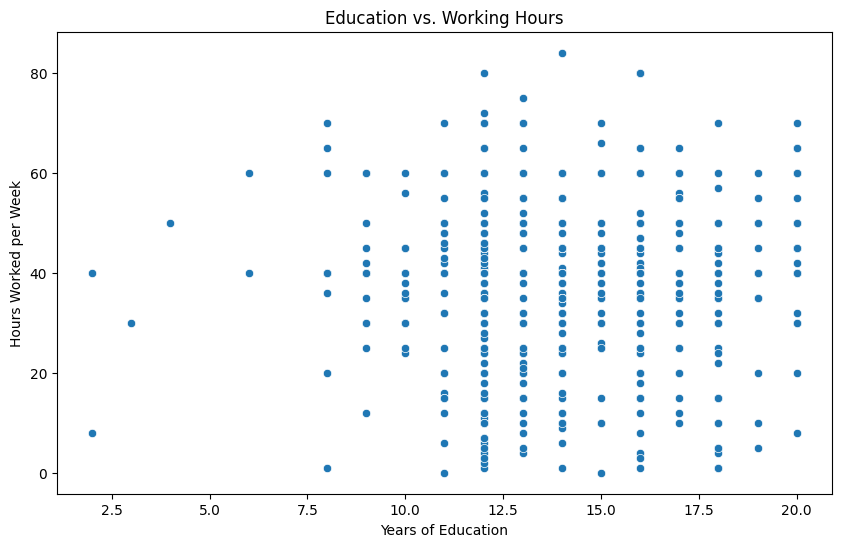

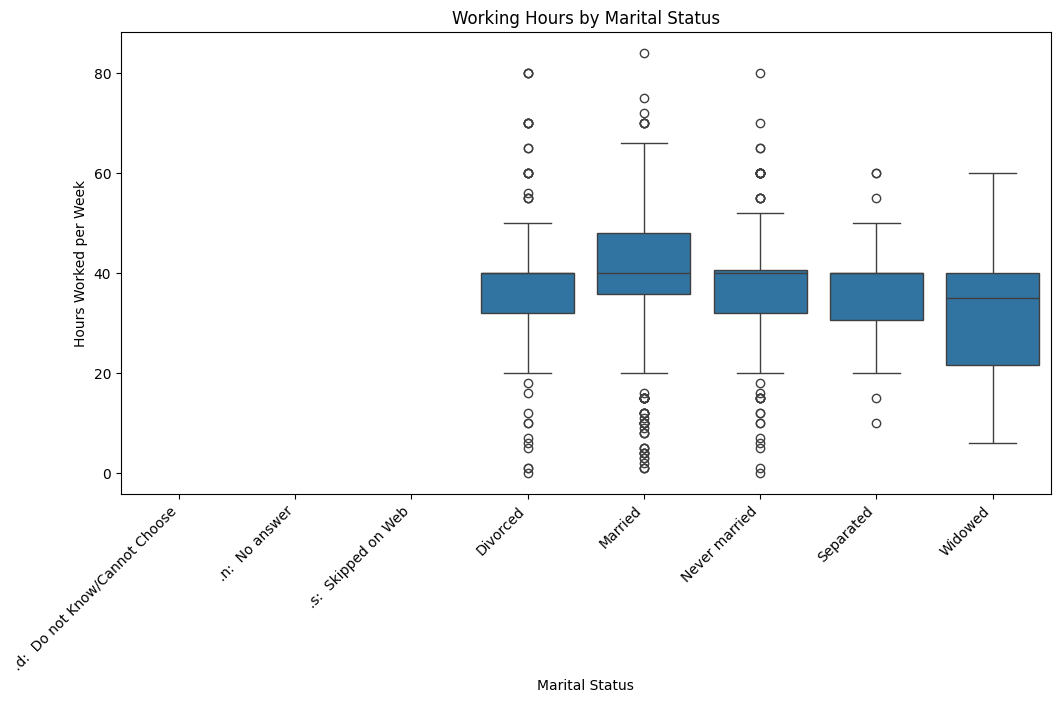

<ipython-input-48-4b1c977d15e7>:134: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_educ_marital = df.groupby('marital')['educ'].mean().sort_values(ascending=False)
<ipython-input-48-4b1c977d15e7>:140: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_hrs_age = df.groupby('age_group')['hrs2'].mean()



Average Education by Marital Status:
marital
Married                           14.563679
Separated                         14.100000
Never married                     13.883117
Divorced                          13.700730
Widowed                           12.850000
.d:  Do not Know/Cannot Choose          NaN
.n:  No answer                          NaN
.s:  Skipped on Web                     NaN
Name: educ, dtype: float64

Average Working Hours by Age Group:
age_group
18-29    38.614379
30-49    39.083333
50+      37.671698
Name: hrs2, dtype: float64


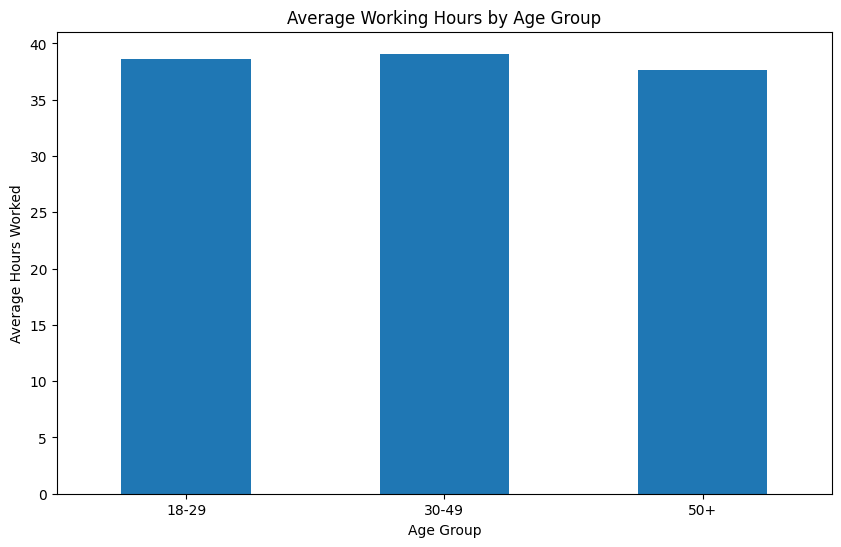

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("/content/GSS_data.csv")

# Print column names
df.columns.tolist()

# Display the first few rows
df.head()

# Replace ".i", ".n", ".d" with NaN
df = df.replace({'.i': np.nan, '.n': np.nan, '.d': np.nan})

df['year'] = pd.to_datetime(df['year'], format='%Y')
df['hrs2'] = pd.to_numeric(df['hrs2'], errors='coerce')  # 'coerce' turns errors into NaN
df['sibs'] = pd.to_numeric(df['sibs'], errors='coerce')
df['childs'] = pd.to_numeric(df['childs'], errors='coerce')
df['age'] = pd.to_numeric(df['age'], errors='coerce')

def clean_educ(educ):
    if isinstance(educ, str):
        if 'No formal schooling' in educ:
            return 0
        elif '8 or more years of college' in educ:
            return 20  # Assuming 8 years includes 4 for undergrad + 4 grad
        elif '4 years of college' in educ:
            return 16
        elif '3 years of college' in educ:
            return 15
        elif '2 years of college' in educ:
            return 14
        elif '1 year of college' in educ:
            return 13
        elif '12th grade' in educ:
            return 12
        elif '11th grade' in educ:
            return 11
        elif '10th grade' in educ:
            return 10
        elif '9th grade' in educ:
            return 9
        elif '8th grade' in educ:
            return 8
        elif '7 years of college' in educ:
            return 19
        elif '6 years of college' in educ:
            return 18
        elif '5 years of college' in educ:
            return 17
        elif '6th grade' in educ:
            return 6
        elif '5th grade' in educ:
            return 5
        elif '4th grade' in educ:
            return 4
        elif '3rd grade' in educ:
            return 3
        elif '2nd grade' in educ:
            return 2
        elif '1st grade' in educ:
            return 1

    return np.nan

df['educ'] = df['educ'].apply(clean_educ)
df['educ'] = pd.to_numeric(df['educ'], errors='coerce')

df['marital'] = df['marital'].astype('category')
df = df.dropna()

# Display cleaned data info
print("\nCleaned Data Info:")
df.info()

# Descriptive statistics
print("\nDescriptive Statistics:")
df.describe()

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Education
plt.figure(figsize=(10, 6))
sns.histplot(df['educ'], kde=True)
plt.title('Distribution of Education (Years)')
plt.xlabel('Years of Education')
plt.ylabel('Frequency')
plt.show()

# Marital Status Counts
plt.figure(figsize=(10, 6))
sns.countplot(x='marital', data=df)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Age vs. Number of Children
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='childs', data=df)
plt.title('Age vs. Number of Children')
plt.xlabel('Age')
plt.ylabel('Number of Children')
plt.show()

# Education vs. Working Hours
plt.figure(figsize=(10, 6))
sns.scatterplot(x='educ', y='hrs2', data=df)
plt.title('Education vs. Working Hours')
plt.xlabel('Years of Education')
plt.ylabel('Hours Worked per Week')
plt.show()

# Boxplot of Working Hours by Marital Status
plt.figure(figsize=(12, 6))
sns.boxplot(x='marital', y='hrs2', data=df)
plt.title('Working Hours by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Hours Worked per Week')
plt.xticks(rotation=45, ha='right')
plt.show()

# Average Education by Marital Status
avg_educ_marital = df.groupby('marital')['educ'].mean().sort_values(ascending=False)
print("\nAverage Education by Marital Status:")
print(avg_educ_marital)

# Average Working Hours by Age Group
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 100], labels=['18-29', '30-49', '50+'])
avg_hrs_age = df.groupby('age_group')['hrs2'].mean()
print("\nAverage Working Hours by Age Group:")
print(avg_hrs_age)

plt.figure(figsize=(10, 6))
avg_hrs_age.plot(kind='bar')
plt.title('Average Working Hours by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Hours Worked')
plt.xticks(rotation=0)
plt.show()